In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

AttributeError: module 'numpy' has no attribute 'ndarray'

In [160]:
fraud = pd.read_csv("Fraud_check.csv")

In [161]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [162]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [163]:
fraud = pd.get_dummies(fraud, columns=["Undergrad", "Marital.Status", "Urban"], drop_first=True)

In [164]:
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"],bins = [10002,30000,99620],labels = ["Risky", "Good"])

In [165]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [166]:
fraud = pd.get_dummies(fraud,columns = ["TaxInc"], drop_first = True)

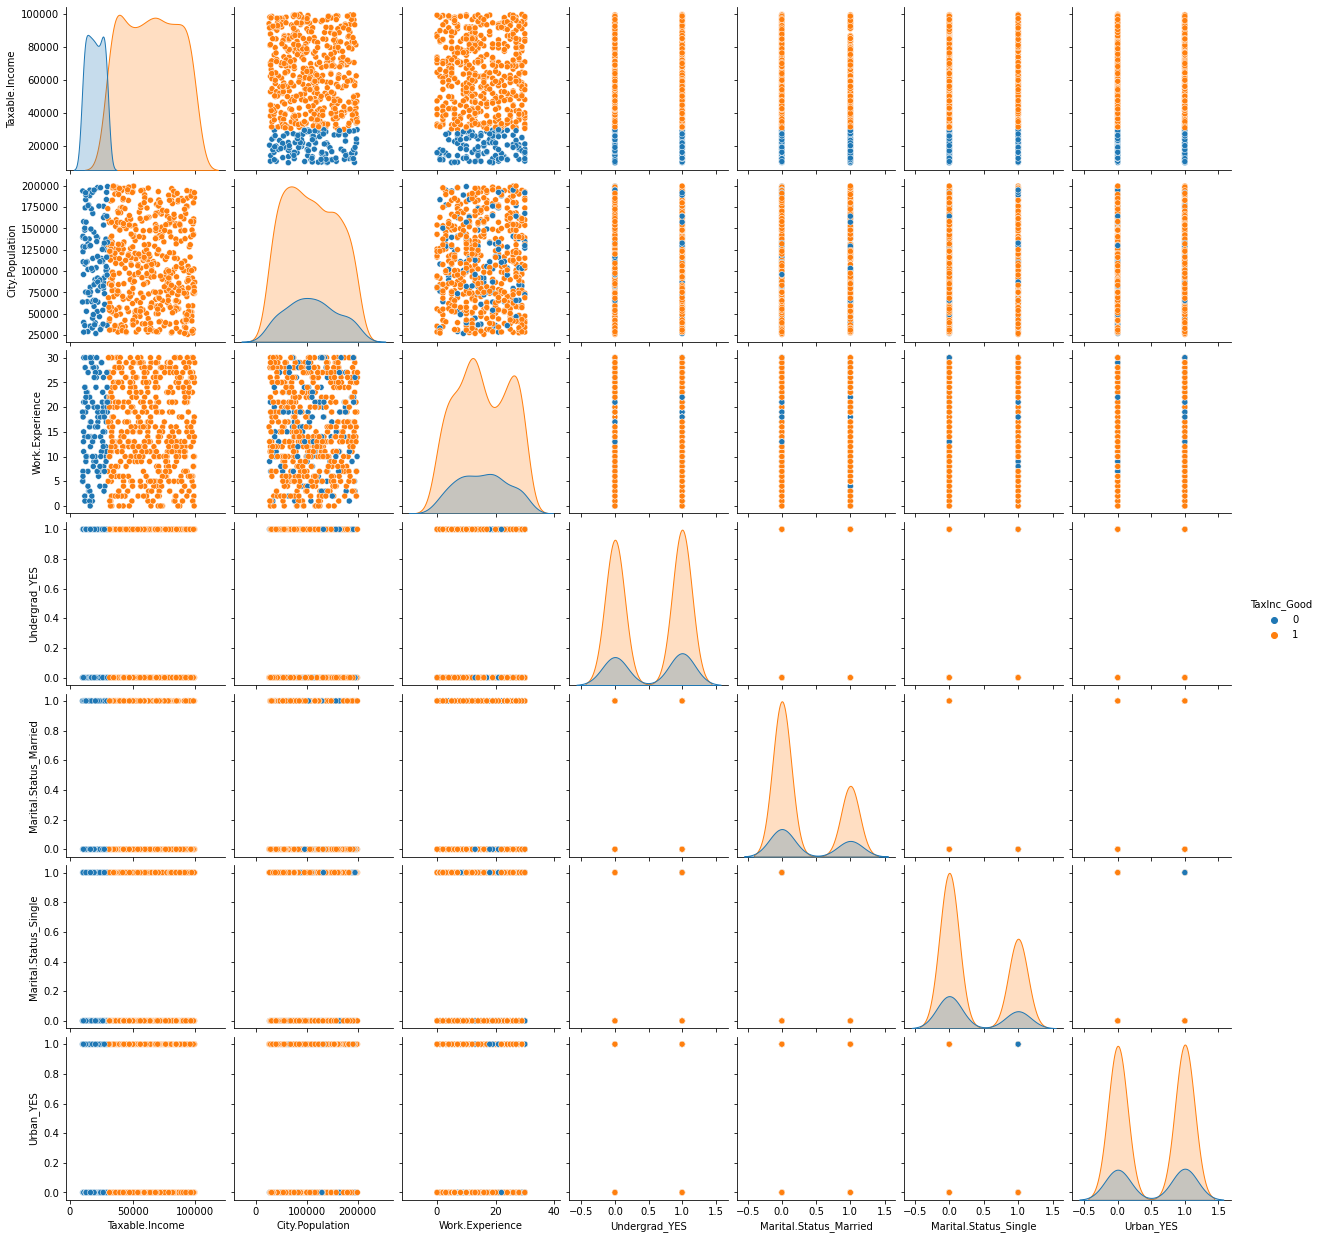

In [167]:
sns.pairplot(data = fraud, hue = "TaxInc_Good")

In [168]:
def norm_func(i):
    x = (i-i.min())/(i.max() - i.min())
    return(x)

In [169]:
df_norm = norm_func(fraud.iloc[:,1:])
df_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [170]:
X = df_norm.drop(["TaxInc_Good"], axis = 1)
Y = df_norm["TaxInc_Good"]

In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [172]:
df_norm["income"] = "<=30000"
df_norm.loc[fraud["Taxable.Income"]>=30000, "income"] = "Good"
df_norm.loc[fraud["Taxable.Income"]<=30000, "income"] = "Risky"

In [173]:
fraud.drop(["Taxable.Income"], axis = 1, inplace = True )

In [174]:
fraud.rename(columns={"Undergrad":"undergrad", "Marital.Status":"marital","City.Police":"Police"})

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


In [175]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name] = le.fit_transform(fraud[column_name])
    else:
        pass
    

In [176]:
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [177]:
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [178]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify = labels)

In [179]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_jobs = 3, n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [180]:
model.estimators_
model.classes_
model.n_classes_

2

In [181]:
model.n_outputs_

1

In [182]:
model.oob_score_

0.5208333333333334

In [183]:
prediction = model.predict(x_train)

In [184]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, prediction)

In [185]:
np.mean(prediction == y_train)

0.9791666666666666

In [186]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, prediction)

In [187]:
pred_test = model.predict(x_test)

In [188]:
acc_test = accuracy_score(y_test, pred_test)

In [189]:
from sklearn.tree import export_graphviz
from six import StringIO

In [190]:
tree = model.estimators_[5]

In [191]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True, rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [192]:
import pydotplus

In [193]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [194]:
#Building Decision Tree Classifier using Entrophy critera

In [198]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

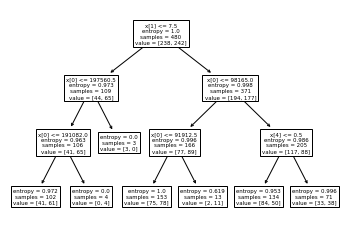

In [203]:
tree.plot_tree(model);

In [206]:
colnames = list(fraud.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [221]:
fn = ["City.Population", "Work.Experience", "Undergrad_YES","Marital.Status_Married", "Marital.Status_Single", "Urban_YES"]
cn = ["1", "0"]
fig, axes = plt.subplots(nrows = 1, ncols =1, figsize = (4,4), dpi = 356)
tree.plot_tree(model,
              feature_names = fn,
              class_names = cn,
              filled = True);

In [222]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    90
0    30
dtype: int64

In [223]:
preds

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=uint8)

In [224]:
pd.crosstab(y_test, preds)

col_0,0,1
Urban_YES,,
0,18,42
1,12,48


In [226]:
np.mean(preds==y_test)

0.55

In [227]:
#Building Decision Tree Classifier using Gini criteria

In [228]:
model_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 3)

In [229]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [230]:
pred = model.predict(x_test)
np.mean(preds==y_test)

0.55

In [231]:
#Decision tree Regression 

In [232]:
from sklearn.tree import DecisionTreeRegressor

In [234]:
array = fraud.values
X = array[:,0:3]
y = array[:,3]

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 19)

In [237]:
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)

DecisionTreeRegressor()

In [238]:
model1.score(X_test, y_test)

-0.9318181818181814